In [1]:
#pip install xlrd
#pip install wordcloud

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 100)
%matplotlib inline
import warnings
import datetime
warnings.filterwarnings("ignore")
from wordcloud import WordCloud 
# set font
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

# set the style of the axes and the text color
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
plt.rcParams['text.color']='#333F4B'

In [3]:
movie_data = pd.read_excel('data/movie_metadata.xls')
movie_data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_movie_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,movie_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar¬†,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.movie.com/title/tt0499549/?ref_=fn_...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End¬†,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.movie.com/title/tt0449088/?ref_=fn_...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre¬†,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.movie.com/title/tt2379713/?ref_=fn_...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises¬†,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.movie.com/title/tt1345836/?ref_=fn_...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens¬† ...,8,143,NaN,0.0,NaN,http://www.movie.com/title/tt5289954/?ref_=fn_...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


#### Inflation

In [4]:
inflation = pd.read_csv('data/PPI.csv')
inflation = inflation[inflation['PCUOMFGOMFG'] != '.']
inflation['DATE'] = [int(i.year) for i in pd.to_datetime(inflation['DATE'], format='%Y-%m-%d')]
inflation['PCUOMFGOMFG'] = [float(i) for i in inflation['PCUOMFGOMFG']]
inflation = inflation.groupby('DATE').mean().reset_index()

In [5]:
inflation_ranged = pd.DataFrame({'DATE': inflation['DATE'], 'Ind': inflation['PCUOMFGOMFG'].iloc[-1] / inflation['PCUOMFGOMFG']})

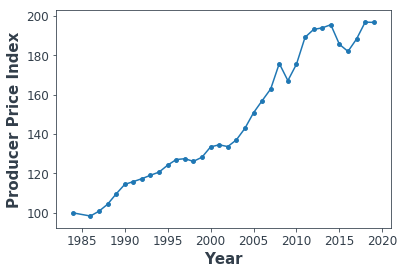

In [6]:
plt.plot(inflation['DATE'], inflation['PCUOMFGOMFG'])
plt.scatter(inflation['DATE'], inflation['PCUOMFGOMFG'], s=15)
plt.xlabel('Year', fontsize=15, fontweight='black', color = '#333F4B')
plt.ylabel('Producer Price Index', fontsize=15, fontweight='black', color = '#333F4B')
plt.tick_params(axis='both', which='major', labelsize=12)
plt.savefig('pics/PPI.png', dpi=300, bbox_inches='tight')

Fill missing values in year

In [7]:
movie_data['title_year'].isnull().sum()

108

In [8]:
movie_data = movie_data.dropna(subset=['title_year'])

In [9]:
#movie_data['title_year'] = movie_data['title_year'].fillna(np.mean(movie_data['title_year']))

#### Number of movies over time

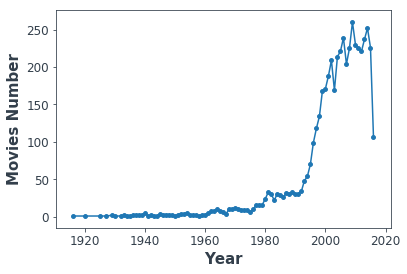

In [10]:
year_number = pd.DataFrame(movie_data['title_year'].value_counts()).reset_index().sort_values(by = 'index', ascending=True)
plt.plot(year_number['index'], year_number['title_year'])
plt.scatter(year_number['index'], year_number['title_year'], s=15)
plt.xlabel('Year', fontsize=15, fontweight='black', color = '#333F4B')
plt.ylabel('Movies Number', fontsize=15, fontweight='black', color = '#333F4B')
plt.tick_params(axis='both', which='major', labelsize=12)
plt.savefig('pics/number_over_year.png', dpi=300, bbox_inches='tight')

In [11]:
movie_data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_movie_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,movie_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar¬†,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.movie.com/title/tt0499549/?ref_=fn_...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End¬†,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.movie.com/title/tt0449088/?ref_=fn_...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre¬†,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.movie.com/title/tt2379713/?ref_=fn_...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises¬†,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.movie.com/title/tt1345836/?ref_=fn_...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter¬†,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.movie.com/title/tt0401729/?ref_=fn_...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000


#### Delete old movies

In [12]:
movie = movie_data

In [13]:
movie['DATE'] = [int(x) for x in round(movie['title_year'], 0)]

In [14]:
movie = pd.merge(movie, inflation_ranged, how='left', on='DATE')

In [15]:
movie.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_movie_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,movie_score,aspect_ratio,movie_facebook_likes,DATE,Ind
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar¬†,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.movie.com/title/tt0499549/?ref_=fn_...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,2009,1.176872
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End¬†,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.movie.com/title/tt0449088/?ref_=fn_...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,2007,1.207274
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre¬†,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.movie.com/title/tt2379713/?ref_=fn_...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,2015,1.059957
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises¬†,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.movie.com/title/tt1345836/?ref_=fn_...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,2012,1.018558
4,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter¬†,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.movie.com/title/tt0401729/?ref_=fn_...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,2012,1.018558


In [16]:
del movie['title_year']

In [17]:
movie = movie[movie['DATE'] > 1985]

#### Adjustments by inflation

In [18]:
movie['gross'] = movie['gross']*movie['Ind']
movie['budget'] = movie['budget']*movie['Ind']

#### Features Transformation

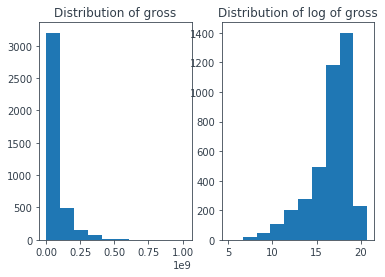

In [19]:
plt.subplots(221)
plt.subplot(1, 2, 1)
plt.hist(movie['gross']);
plt.title('Distribution of gross');
plt.subplot(1, 2, 2)
plt.hist(np.log1p(movie['gross']));
plt.title('Distribution of log of gross');

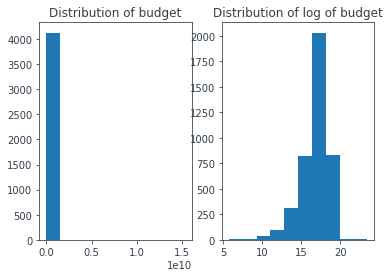

In [20]:
plt.subplots(221)
plt.subplot(1, 2, 1)
plt.hist(movie['budget']);
plt.title('Distribution of budget');
plt.subplot(1, 2, 2)
plt.hist(np.log1p(movie['budget']));
plt.title('Distribution of log of budget');

In [21]:
movie['log_gross'] = np.log1p(movie['gross'])
movie['log_budget'] = np.log1p(movie['budget'])
movie['log_num_voted_users'] = np.log1p(movie['num_voted_users'])
movie['log_num_user_for_reviews'] = np.log1p(movie['num_user_for_reviews'])
movie['log_movie_facebook_likes'] = np.log1p(movie['movie_facebook_likes'])
movie['log_cast_total_facebook_likes'] = np.log1p(movie['cast_total_facebook_likes'])
movie['log_num_critic_for_reviews'] = np.log1p(movie['num_critic_for_reviews'])
movie['log_actor_1_facebook_likes'] = np.log1p(movie['actor_1_facebook_likes'])

In [22]:
movie['profit'] = movie['gross'] - movie['budget']
movie['log_profit'] = np.log1p(movie['profit'])

In [23]:
movie['inv_return'] = movie['profit']/movie['budget']
movie['log_inv_return'] = np.log1p(movie['inv_return'])

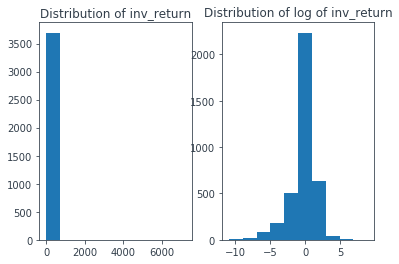

In [24]:
plt.subplots(221)
plt.subplot(1, 2, 1)
plt.hist(movie['inv_return']);
plt.title('Distribution of inv_return');
plt.subplot(1, 2, 2)
plt.hist(np.log1p(movie['inv_return']));
plt.title('Distribution of log of inv_return');

#### Scatter Plots

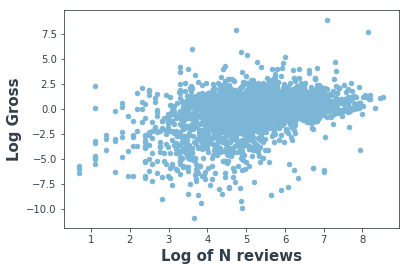

In [25]:
movie.plot(kind="scatter", x= 'log_num_user_for_reviews', y="log_inv_return", color = sns.color_palette("RdBu", n_colors = 10)[7])
plt.xlabel('Log of N reviews', fontsize=15, fontweight='black', color = '#333F4B')
plt.ylabel('Log Gross', fontsize=15, fontweight='black', color = '#333F4B')
plt.savefig('pics/corr_log_gross&log_num_users.png', dpi=300, bbox_inches='tight')

####  Exploring correlation

In [26]:
cols = [ 'log_gross', 'log_num_voted_users', 'log_cast_total_facebook_likes', 'log_num_user_for_reviews', 'log_budget', 'movie_score', 'log_movie_facebook_likes', 'actor_1_facebook_likes', 'num_critic_for_reviews']

In [27]:
corr_movie = movie[cols]

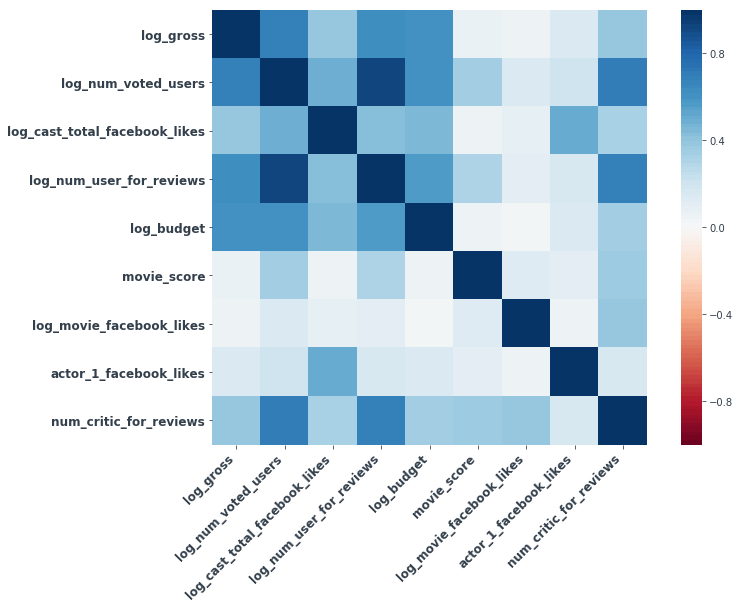

In [28]:
corr = corr_movie.corr()
plt.figure(figsize=(12, 8))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.color_palette("RdBu", n_colors = 100),
    square=True)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right', fontsize=12,fontweight='black', color = '#333F4B')

ax.set_yticklabels(
    ax.get_xticklabels(),
    horizontalalignment='right', fontsize=12,fontweight='black', color = '#333F4B');
plt.savefig('pics/corr_plt_en.png', dpi=300, bbox_inches='tight')

#### Exploring the language

In [29]:
lang_df = movie.loc[movie['language'].isin(movie['language'].value_counts().head(10).index)]

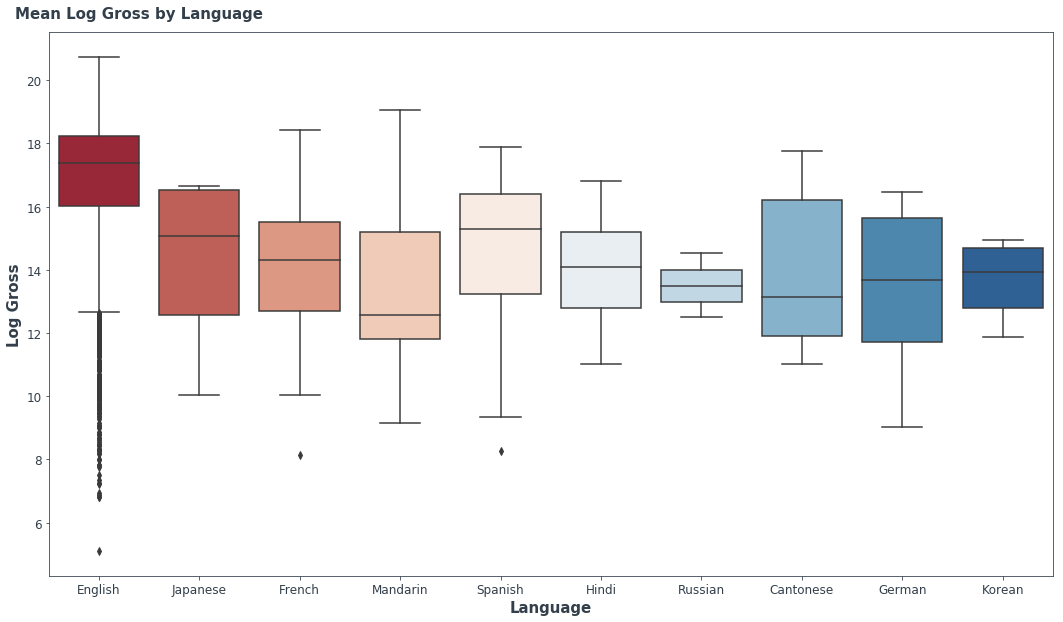

In [30]:
plt.figure(figsize=(18, 10))
sns.boxplot(x='language', y='log_gross',  data= lang_df, palette = sns.color_palette("RdBu", n_colors=10));
plt.xlabel('Language', fontsize=15, fontweight='black', color = '#333F4B')
plt.ylabel('Log Gross', fontsize=15, fontweight='black', color = '#333F4B')
plt.tick_params(axis='both', which='major', labelsize=12)
plt.text(-0.83, 21.96, 'Mean Log Gross by Language', fontsize=15, fontweight='black', color = '#333F4B')
plt.savefig('pics/language.png', dpi=300, bbox_inches='tight')

In [31]:
gross_high = movie[movie['profit'] >= 15000000]
gross_low = movie[movie['profit'] <= -6000000]

#### Exploring the most and least profitable movies by genres

In [32]:
def plot_hbar(data, title, save_name, column):

    #reindexing new data
    data.index = range(len(data))

    #we will start from 1 instead of 0
    data.index = data.index + 1

    #printing the changed dataset
    data.head(3)
    # formatting the data in the genres columns
    data[column] = data[column].str.strip('[]').str.replace('|',',').str.replace("'",'')
    data[column] = data[column].str.split(',')

    list1 = []
    # extending the list1 and list2 to 
    for i in data[column]:
        list1.extend(i)

    df1 = pd.DataFrame(pd.Series(str(i) for i in list1).str.replace("\t","").str.replace(" ","").value_counts().sort_values(ascending=True)[0:10], columns = ['Number'])
    # we first need a numeric placeholder for the y axis
    my_range=list(range(1,len(df1.index)+1))

    fig, ax = plt.subplots(figsize=(5,3.5))

    # create for each expense type an horizontal line that starts at x = 0 with the length 
    # represented by the specific expense percentage value.
    plt.hlines(y=my_range, xmin=0, xmax=df1['Number'], color='#007ACC', alpha=0.2, linewidth=5)

    # create for each expense type a dot at the level of the expense percentage value
    plt.plot(df1['Number'], my_range, "o", markersize=5, color='#007ACC', alpha=0.6)

    # set labels
    ax.set_xlabel('Number', fontsize=15, fontweight='black', color = '#333F4B')
    ax.set_ylabel('')

    # set axis
    ax.tick_params(axis='both', which='major', labelsize=12)
    plt.yticks(my_range, df1.index)

    # add an horizonal label for the y axis 
    fig.text(-0.23, 0.96, title, fontsize=15, fontweight='black', color = '#333F4B')

    # change the style of the axis spines
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_smart_bounds(True)
    ax.spines['bottom'].set_smart_bounds(True)

    # set the spines position
    ax.spines['bottom'].set_position(('axes', -0.04))
    ax.spines['left'].set_position(('axes', 0.015))

    plt.savefig('pics/{}&{}.png'.format(column, save_name), dpi=300, bbox_inches='tight')


In [33]:
gross_high = movie[movie['profit'] >= 10000000]

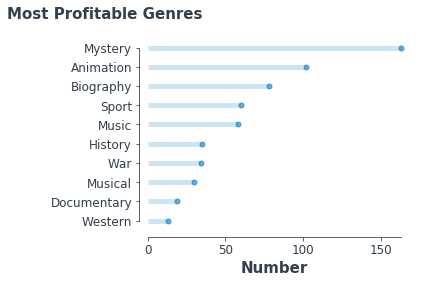

In [34]:
plot_hbar(movie[movie['profit'] >= 10000000], 'Most Profitable Genres', save_name = 'high', column = 'genres')

In [35]:
plot_hbar(movie[movie['profit'] <= -6000000], 'Least Profitable Genres', save_name = 'low')

TypeError: plot_hbar() missing 1 required positional argument: 'column'

#### Exploring the budget over time

In [ ]:
movie.tail()

In [ ]:
year_profit = movie.groupby('DATE')['log_profit'].sum().reset_index()

In [ ]:
movie.groupby('DATE')['log_profit'].count().reset_index()

In [ ]:
movie.groupby('DATE')['log_profit'].sum().plot()
plt.scatter(year_profit['DATE'], year_profit['log_profit'], s=15)
plt.xlabel('Year', fontsize=15, fontweight='black', color = '#333F4B')
plt.ylabel('Profit Adjusted by Inflation', fontsize=15, fontweight='black', color = '#333F4B')
plt.tick_params(axis='both', which='major', labelsize=12)
plt.savefig('pics/profit_over_time.png', dpi=300, bbox_inches='tight')

In [ ]:
#plt.plot(movie['DATE'], movie['budget'])
plt.scatter(movie['DATE'], movie['log_profit'], s=15)
plt.xlabel('Year', fontsize=15, fontweight='black', color = '#333F4B')
plt.ylabel('Budget adjusted by Inflation', fontsize=15, fontweight='black', color = '#333F4B')
plt.tick_params(axis='both', which='major', labelsize=12)
plt.savefig('pics/PPI.png', dpi=300, bbox_inches='tight')

In [ ]:
len(gross_high)

In [ ]:
gross_high = movie[movie['profit'] >= 100000000]
plt.figure(figsize = (12, 12))
text = ' '.join(gross_high['plot_keywords'].values)
wordcloud = WordCloud(max_font_size=None, background_color='white', width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Keywords in most profitable movies', fontsize=15, fontweight='black', color = '#333F4B', loc = 'left')
plt.axis("off")
plt.show()
wordcloud.to_file('pics/words_most.png')

In [ ]:
len(gross_low)

In [ ]:
gross_low = gross_low = movie[movie['profit'] <= -50000000]
plt.figure(figsize = (12, 12))
text = ' '.join(str(v) for v in gross_low['plot_keywords'].values)
wordcloud = WordCloud(max_font_size=None, background_color='white', width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Keywords in least profitable movies', fontsize=15, fontweight='black', color = '#333F4B', loc = 'left')
plt.axis("off")
plt.show()
wordcloud.to_file('pics/words_least.png')

In [ ]:
df_act_high = pd.DataFrame(movie[movie['profit'] >= 1000000].groupby('actor_1_name')['color'].count().sort_values(ascending = False))[0:10].reset_index().rename(columns = {'color': 'Number'})

In [ ]:
df_act_high_inv_ret = pd.DataFrame(movie[movie['log_inv_return'] >= 0.5].groupby('actor_1_name')['color'].count().sort_values(ascending = False))[0:10].reset_index().rename(columns = {'color': 'Number'})

In [ ]:
movie['log_inv_return'].plot(kind = 'hist')

In [ ]:
len(df_act_high_inv_ret)

In [ ]:
my_range=list(range(1,len(df_act_high_inv_ret.index)+1))

fig, ax = plt.subplots(figsize=(5,3.5))

# create for each expense type an horizontal line that starts at x = 0 with the length 
# represented by the specific expense percentage value.
plt.hlines(y=my_range[::-1], xmin=0, xmax=df_act_high_inv_ret['Number'], color='#007ACC', alpha=0.2, linewidth=5)

# create for each expense type a dot at the level of the expense percentage value
plt.plot(df_act_high_inv_ret['Number'], my_range[::-1], "o", markersize=5, color='#007ACC', alpha=0.6)

# set labels
ax.set_xlabel('Number', fontsize=15, fontweight='black', color = '#333F4B')
ax.set_ylabel('')

# set axis
ax.tick_params(axis='both', which='major', labelsize=12)
plt.yticks(my_range, df_act_high_inv_ret['actor_1_name'][::-1])

# add an horizonal label for the y axis 
fig.text(-0.23, 0.96, 'Most Profitable Actors', fontsize=15, fontweight='black', color = '#333F4B')

# change the style of the axis spines
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)

# set the spines position
ax.spines['bottom'].set_position(('axes', -0.04))
ax.spines['left'].set_position(('axes', 0.015))

plt.savefig('pics/most_profitable_actors.png', dpi=300, bbox_inches='tight')

In [ ]:
df_act_low = pd.DataFrame(movie[movie['profit'] <= -50000000].groupby('actor_1_name')['color'].count().sort_values(ascending = False))[0:10].reset_index().rename(columns = {'color': 'Number'})

In [ ]:
df_act_low_inv_ret = pd.DataFrame(movie[movie['log_inv_return'] <= -1.5].groupby('actor_1_name')['color'].count().sort_values(ascending = False))[0:10].reset_index().rename(columns = {'color': 'Number'})

In [ ]:
my_range=list(range(1,len(df_act_low_inv_ret.index)+1))

fig, ax = plt.subplots(figsize=(5,3.5))

# create for each expense type an horizontal line that starts at x = 0 with the length 
# represented by the specific expense percentage value.
plt.hlines(y=my_range[::-1], xmin=0, xmax=df_act_low_inv_ret['Number'], color='#007ACC', alpha=0.2, linewidth=5)

# create for each expense type a dot at the level of the expense percentage value
plt.plot(df_act_low_inv_ret['Number'], my_range[::-1], "o", markersize=5, color='#007ACC', alpha=0.6)

# set labels
ax.set_xlabel('Number', fontsize=15, fontweight='black', color = '#333F4B')
ax.set_ylabel('')

# set axis
ax.tick_params(axis='both', which='major', labelsize=12)
plt.yticks(my_range, df_act_low_inv_ret['actor_1_name'][::-1])

# add an horizonal label for the y axis 
fig.text(-0.23, 0.96, 'Least Profitable Actors', fontsize=15, fontweight='black', color = '#333F4B')

# change the style of the axis spines
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)

# set the spines position
ax.spines['bottom'].set_position(('axes', -0.04))
ax.spines['left'].set_position(('axes', 0.015))

plt.savefig('pics/least_profitable_actors.png', dpi=300, bbox_inches='tight')

#### Exploring Duration

In [ ]:
#plt.figure(figsize=(9,5), dpi = 100)

#On x-axis 
plt.xlabel('Duration', fontsize = 15)
#On y-axis 
plt.ylabel('Nos.of Movies in the Dataset', fontsize=12)
#Name of the graph
plt.title('Duration of least the Successful Movies', fontsize=12)
#giving a histogram plot
plt.hist(movie[movie['log_inv_return'] <= -1.5]['duration'], rwidth = 0.9, bins =35)
#displays the plot
plt.show()
plt.savefig('pics/duration_less.png')

In [ ]:
plt.xlabel('Duration', fontsize = 12)
plt.ylabel('Nos.of Movies in the Duration', fontsize=12)
plt.title('Duration Distribution of the less Successful Movies', fontsize=15)
plt.hist(movie[movie['log_inv_return'] >= 2]['duration'], rwidth = 0.9, bins =35)
plt.show()
plt.savefig('pics/duration_more.png')